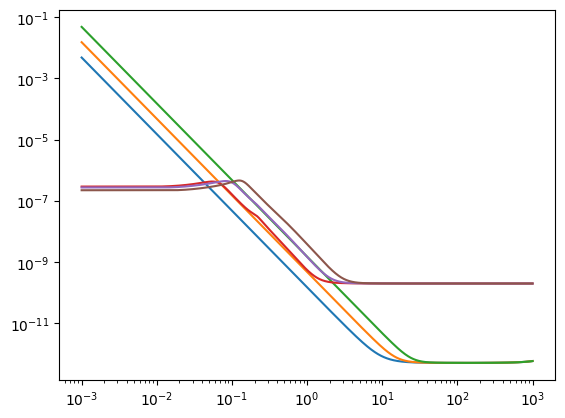

In [70]:
import control
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

import kontrol

def noise_model(f, na, nb, a, b):
    noise = ((na/f**a)**2+(nb/f**b)**2)**.5
    return noise


def sts_model(f, na, a):
    noise = na/f**a
    return noise


n_ade1_params = [1*10**-10.0625, 2e-10, 0.75, 0]

f = np.logspace(-3, 3, 1024)
ade1 = noise_model(f, *n_ade1_params)

sts_low_args = [10**-9.825 ,2.5]
sts_mid_args = [10**-9.325 ,2.5]
sts_high_args = [10**-8.825 ,2.5]
sts_low = sts_model(f, *sts_low_args)
sts_mid = sts_model(f, *sts_mid_args)
sts_high = sts_model(f, *sts_high_args)


t120h = scipy.io.loadmat("../data/t120h.mat")["n_t120h"].flatten()

sts_low = (sts_low**2 + t120h**2)**0.5
sts_mid = (sts_mid**2 + t120h**2)**0.5
sts_high = (sts_high**2 + t120h**2)**0.5

seismic_low = kontrol.load_transfer_function("noise_models/seismic_low.pkl")
seismic_mid = kontrol.load_transfer_function("noise_models/seismic_mid.pkl")
seismic_high = kontrol.load_transfer_function("noise_models/seismic_high.pkl")

seismic_low = abs(seismic_low(1j*2*np.pi*f))
seismic_mid = abs(seismic_mid(1j*2*np.pi*f))
seismic_high = abs(seismic_high(1j*2*np.pi*f))

# Prefilter
prefilter = kontrol.load_transfer_function("sensor_correction_filters/prefilter.pkl")

# Low seismic noise
h_sc_low_low = kontrol.load_transfer_function("sensor_correction_filters/h_sc_low_low.pkl") * prefilter
h_sc_low_mid = kontrol.load_transfer_function("sensor_correction_filters/h_sc_low_mid.pkl") * prefilter
h_sc_low_high = kontrol.load_transfer_function("sensor_correction_filters/h_sc_low_high.pkl") * prefilter

# Mid seismic noise
h_sc_mid_low = kontrol.load_transfer_function("sensor_correction_filters/h_sc_mid_low.pkl") * prefilter
h_sc_mid_mid = kontrol.load_transfer_function("sensor_correction_filters/h_sc_mid_mid.pkl") * prefilter
h_sc_mid_high = kontrol.load_transfer_function("sensor_correction_filters/h_sc_mid_high.pkl") * prefilter

# High seismic noise
h_sc_high_low = kontrol.load_transfer_function("sensor_correction_filters/h_sc_high_low.pkl") * prefilter
h_sc_high_mid = kontrol.load_transfer_function("sensor_correction_filters/h_sc_high_mid.pkl") * prefilter
h_sc_high_high = kontrol.load_transfer_function("sensor_correction_filters/h_sc_high_high.pkl") * prefilter



# Seismic noise suppression estimate
# Low seismic noise
seismic_low_low = abs((1-h_sc_low_low)(1j*2*np.pi*f)) * seismic_low
seismic_low_mid = abs((1-h_sc_low_mid)(1j*2*np.pi*f)) * seismic_low
seismic_low_high = abs((1-h_sc_low_high)(1j*2*np.pi*f)) * seismic_low

# Mid seismic noise
seismic_mid_low = abs((1-h_sc_mid_low)(1j*2*np.pi*f)) * seismic_mid
seismic_mid_mid = abs((1-h_sc_mid_mid)(1j*2*np.pi*f)) * seismic_mid
seismic_mid_high = abs((1-h_sc_mid_high)(1j*2*np.pi*f)) * seismic_mid

# High seismic noise
seismic_high_low = abs((1-h_sc_high_low)(1j*2*np.pi*f)) * seismic_high
seismic_high_mid = abs((1-h_sc_high_mid)(1j*2*np.pi*f)) * seismic_high
seismic_high_high = abs((1-h_sc_high_high)(1j*2*np.pi*f)) * seismic_high


# STS noise attenuation estimate
sts_low_low = abs(h_sc_low_low(1j*2*np.pi*f)) * sts_low
sts_low_mid = abs(h_sc_low_mid(1j*2*np.pi*f)) * sts_mid
sts_low_high = abs(h_sc_low_high(1j*2*np.pi*f)) * sts_high

# Mid sts noise
sts_mid_low = abs(h_sc_mid_low(1j*2*np.pi*f)) * sts_low
sts_mid_mid = abs(h_sc_mid_mid(1j*2*np.pi*f)) * sts_mid
sts_mid_high = abs(h_sc_mid_high(1j*2*np.pi*f)) * sts_high

# High sts noise
sts_high_low = abs(h_sc_high_low(1j*2*np.pi*f)) * sts_low
sts_high_mid = abs(h_sc_high_mid(1j*2*np.pi*f)) * sts_mid
sts_high_high = abs(h_sc_high_high(1j*2*np.pi*f)) * sts_high


# Sensor correction noise
n_sc_low_low = (sts_low_low**2 + seismic_low_low**2)**.5
n_sc_low_mid = (sts_low_mid**2 + seismic_low_mid**2)**.5
n_sc_low_high = (sts_low_high**2 + seismic_low_high**2)**.5

n_sc_mid_low = (sts_mid_low**2 + seismic_mid_low**2)**.5
n_sc_mid_mid = (sts_mid_mid**2 + seismic_mid_mid**2)**.5
n_sc_mid_high = (sts_mid_high**2 + seismic_mid_high**2)**.5

n_sc_high_low = (sts_high_low**2 + seismic_high_low**2)**.5
n_sc_high_mid = (sts_high_mid**2 + seismic_high_mid**2)**.5
n_sc_high_high = (sts_high_high**2 + seismic_high_high**2)**.5



# plt.loglog(f, ade1)
plt.loglog(f, sts_low)
plt.loglog(f, sts_mid)
plt.loglog(f, sts_high)

# plt.loglog(f, seismic_low)
# plt.loglog(f, seismic_mid)
# plt.loglog(f, seismic_high)

# plt.loglog(f, n_sc_low_low)
# plt.loglog(f, n_sc_low_mid)
# plt.loglog(f, n_sc_low_high)

# plt.loglog(f, n_sc_mid_low)
# plt.loglog(f, n_sc_mid_mid)
# plt.loglog(f, n_sc_mid_high)

# plt.loglog(f, n_sc_high_low)
# plt.loglog(f, n_sc_high_mid)
# plt.loglog(f, n_sc_high_high)

# plt.loglog(f, seismic_high_low)
# plt.loglog(f, seismic_high_mid)
# plt.loglog(f, seismic_high_high)

plt.loglog(f, n_rel_low_low)
plt.loglog(f, n_rel_low_mid)
plt.loglog(f, n_rel_low_high)

# plt.loglog(f, n_rel_mid_low)
# plt.loglog(f, n_rel_mid_mid)
# plt.loglog(f, n_rel_mid_high)

# plt.loglog(f, n_rel_high_low)
# plt.loglog(f, n_rel_high_mid)
# plt.loglog(f, n_rel_high_high)

In [75]:
f_lower = 1e-2
f_upper = 100
# sts_low_pad = sts_low.copy()
n_rel_low_low[f<f_lower] = n_rel_low_low[f>=f_lower][0]
n_rel_low_mid[f<f_lower] = n_rel_low_mid[f>=f_lower][0]
n_rel_low_high[f<f_lower] = n_rel_low_high[f>=f_lower][0]

n_rel_mid_low[f<f_lower] = n_rel_mid_low[f>=f_lower][0]
n_rel_mid_mid[f<f_lower] = n_rel_mid_mid[f>=f_lower][0]
n_rel_mid_high[f<f_lower] = n_rel_mid_high[f>=f_lower][0]

n_rel_high_low[f<f_lower] = n_rel_high_low[f>=f_lower][0]
n_rel_high_mid[f<f_lower] = n_rel_high_mid[f>=f_lower][0]
n_rel_high_high[f<f_lower] = n_rel_high_high[f>=f_lower][0]

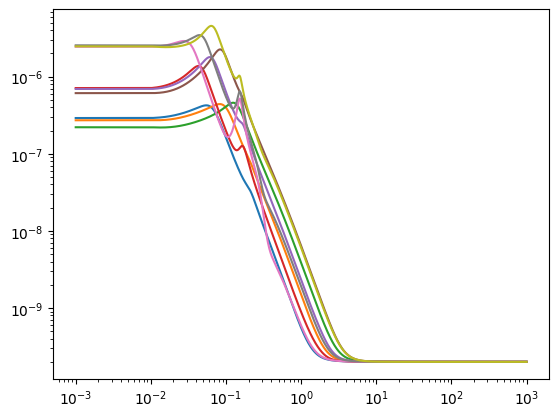

In [79]:
plt.loglog(f, n_rel_low_low)
plt.loglog(f, n_rel_low_mid)
plt.loglog(f, n_rel_low_high)

plt.loglog(f, n_rel_mid_low)
plt.loglog(f, n_rel_mid_mid)
plt.loglog(f, n_rel_mid_high)

plt.loglog(f, n_rel_high_low)
plt.loglog(f, n_rel_high_mid)
plt.loglog(f, n_rel_high_high)

In [67]:
tf_rel_low_low = kontrol.curvefit.spectrum_fit(f=f, spectrum=n_rel_low_low, nzero=4, npole=4)

In [68]:
tf_rel_low_mid = kontrol.curvefit.spectrum_fit(f=f, spectrum=n_rel_low_mid, nzero=4, npole=4)

In [69]:
tf_rel_low_high = kontrol.curvefit.spectrum_fit(f=f, spectrum=n_rel_low_high, nzero=4, npole=4)

In [98]:
tf_rel_mid_low = kontrol.curvefit.spectrum_fit(f=f, spectrum=n_rel_mid_low, nzero=6, npole=6)

In [81]:
tf_rel_mid_mid = kontrol.curvefit.spectrum_fit(f=f, spectrum=n_rel_mid_mid, nzero=4, npole=4)

In [82]:
tf_rel_mid_high = kontrol.curvefit.spectrum_fit(f=f, spectrum=n_rel_mid_high, nzero=4, npole=4)

In [95]:
tf_rel_high_low = kontrol.curvefit.spectrum_fit(f=f, spectrum=n_rel_high_low, nzero=8, npole=8)

In [90]:
tf_rel_high_mid = kontrol.curvefit.spectrum_fit(f=f, spectrum=n_rel_high_mid, nzero=6, npole=6)

In [91]:
tf_rel_high_high = kontrol.curvefit.spectrum_fit(f=f, spectrum=n_rel_high_high, nzero=6, npole=6)

In [51]:
f_ = np.logspace(-4, 3, 1024)

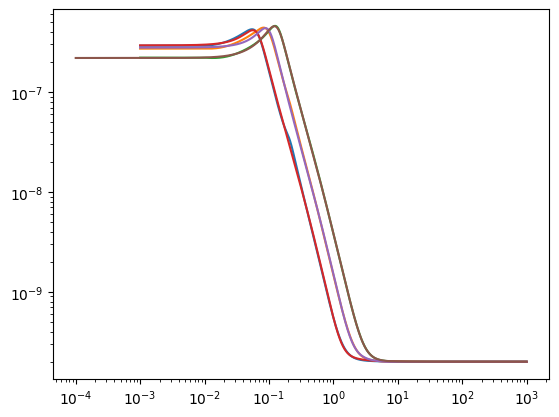

In [86]:
plt.loglog(f, n_rel_low_low)
plt.loglog(f, n_rel_low_mid)
plt.loglog(f, n_rel_low_high)
plt.loglog(f, abs(tf_rel_low_low(1j*2*np.pi*f)))
plt.loglog(f, abs(tf_rel_low_mid(1j*2*np.pi*f)))
plt.loglog(f_, abs(tf_rel_low_high(1j*2*np.pi*f_)))

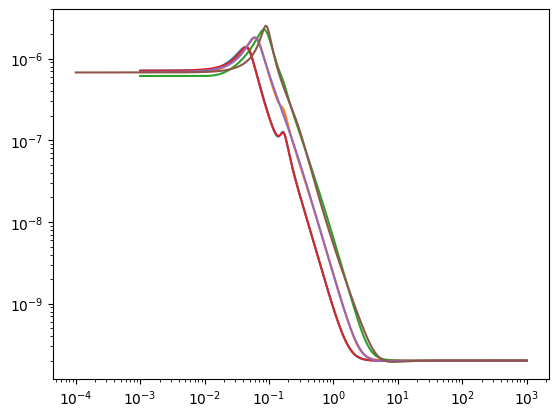

In [99]:
plt.loglog(f, n_rel_mid_low)
plt.loglog(f, n_rel_mid_mid)
plt.loglog(f, n_rel_mid_high)
plt.loglog(f, abs(tf_rel_mid_low(1j*2*np.pi*f)))
plt.loglog(f, abs(tf_rel_mid_mid(1j*2*np.pi*f)))
plt.loglog(f_, abs(tf_rel_mid_high(1j*2*np.pi*f_)))

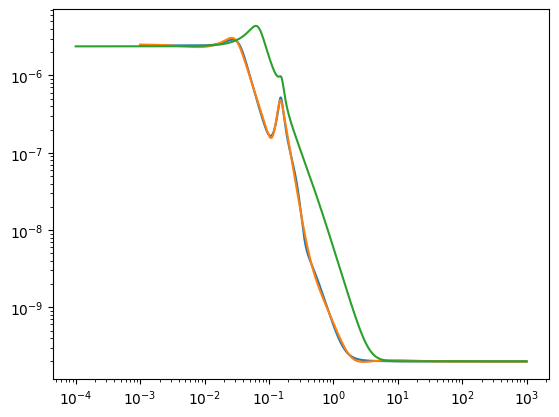

In [106]:
plt.loglog(f, n_rel_high_low)
# plt.loglog(f, n_rel_high_mid)
# plt.loglog(f, n_rel_high_high)
plt.loglog(f, abs(tf_rel_high_low(1j*2*np.pi*f)))
# plt.loglog(f, abs(tf_rel_high_mid(1j*2*np.pi*f)))
# plt.loglog(f_, abs(tf_rel_high_high(1j*2*np.pi*f_)))

In [104]:
tf_rel_low_low.save("noise_models/rel_sc_low_low.pkl")
tf_rel_low_mid.save("noise_models/rel_sc_low_mid.pkl")
tf_rel_low_high.save("noise_models/rel_sc_low_high.pkl")
tf_rel_mid_low.save("noise_models/rel_sc_mid_low.pkl")
tf_rel_mid_mid.save("noise_models/rel_sc_mid_mid.pkl")
tf_rel_mid_high.save("noise_models/rel_sc_mid_high.pkl")
tf_rel_high_low.save("noise_models/rel_sc_high_low.pkl")
tf_rel_high_mid.save("noise_models/rel_sc_high_mid.pkl")
tf_rel_high_high.save("noise_models/rel_sc_high_high.pkl")